In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-finance-data/Personal_Finance_Dataset.csv


In [2]:
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/personal-finance-data/Personal_Finance_Dataset.csv")
df.shape

(1500, 5)

In [4]:
df.head()

,Date,Transaction Description,Category,Amount,Type
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense


In [5]:
df.dtypes

Date                        object
Transaction Description     object
Category                    object
Amount                     float64
Type                        object
dtype: object

In [6]:
totals=df.groupby("Type")["Amount"].sum()

Text(0.5, 1.0, 'Annual Income vs Expenses')

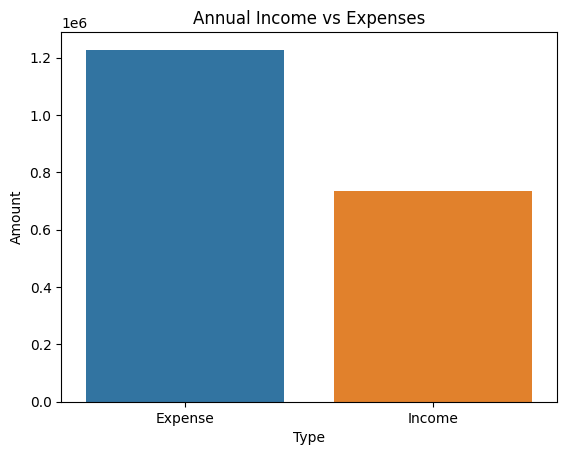

In [7]:
totals = df.groupby("Type")["Amount"].sum().reset_index()

# Plot
sns.barplot(data=totals, x="Type", y="Amount")
plt.title("Annual Income vs Expenses")

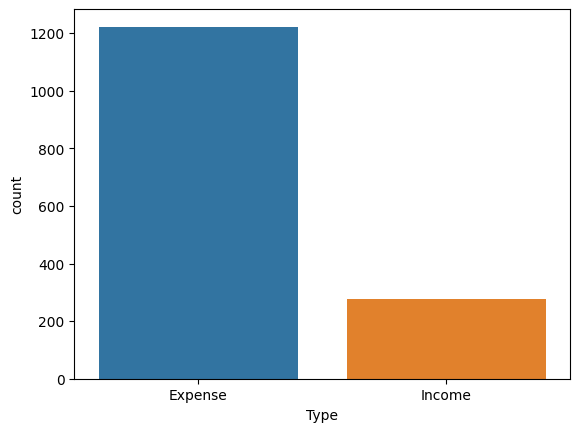

In [8]:
sns.countplot(data=df, x="Type")
plt.show()


In [9]:
df['Category'].unique()

array(['Food & Drink', 'Utilities', 'Rent', 'Investment', 'Shopping',
       'Other', 'Entertainment', 'Health & Fitness', 'Salary', 'Travel'],
      dtype=object)

In [10]:
exp_cat=['Food & Drink','Utilities','Rent','Shopping','Entertainment','Health & Fitness','Travel']
income_cat=['Investment','Salary']

df_expenses = df[df['Category'].isin(exp_cat)].groupby('Category')['Amount'].sum()
df_income=df[df['Category'].isin(income_cat)].groupby('Category')['Amount'].sum()
print("Expenses \n",df_expenses)

print("\n Income \n",df_income)

Expenses 
 Category
Entertainment       148165.47
Food & Drink        159493.39
Health & Fitness    145194.06
Rent                162075.39
Shopping            146880.75
Travel              169497.79
Utilities           146833.97
Name: Amount, dtype: float64

 Income 
 Category
Investment    363252.00
Salary        149053.55
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Expenses Category')

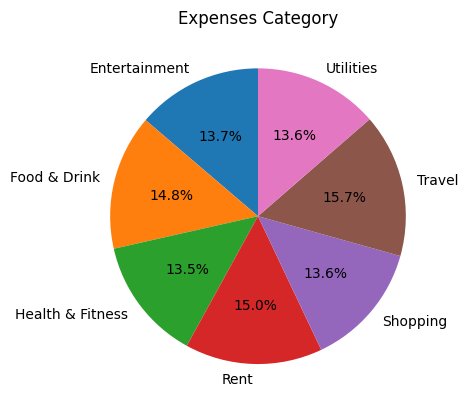

In [11]:
plt.pie(df_expenses,labels=df_expenses.index,autopct="%1.1f%%",startangle=90)
plt.title("Expenses Category")

([<matplotlib.patches.Wedge at 0x7ed773238e10>,
 [Text(-0.8711716238876107, -0.6716100071715904, 'Investment'),
  Text(0.8711716867682742, 0.671609925606613, 'Salary')],
 [Text(-0.4751845221205149, -0.36633273118450377, '70.9%'),
  Text(0.4751845564190586, 0.36633268669451613, '29.1%')])

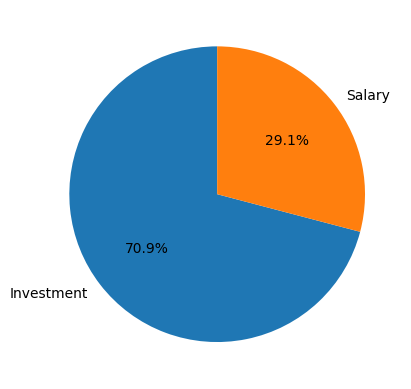

In [12]:
plt.pie(df_income,labels=df_income.index,autopct="%1.1f%%",startangle=90)

In [13]:

df['Date'] = pd.to_datetime(df['Date'])


df_exp_yearly = df.copy()

df_exp_yearly['Year']=df_exp_yearly['Date'].dt.year
df_exp_yearly

,Date,Transaction Description,Category,Amount,Type,Year
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense,2020
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense,2020
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense,2020
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income,2020
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense,2020
...,...,...,...,...,...,...
1495,2024-12-28,Quite as when.,Rent,514.09,Expense,2024
1496,2024-12-28,Right analysis mention.,Entertainment,727.25,Expense,2024
1497,2024-12-28,No couple debate must.,Investment,1425.00,Income,2024
1498,2024-12-29,Discussion black follow.,Shopping,655.78,Expense,2024


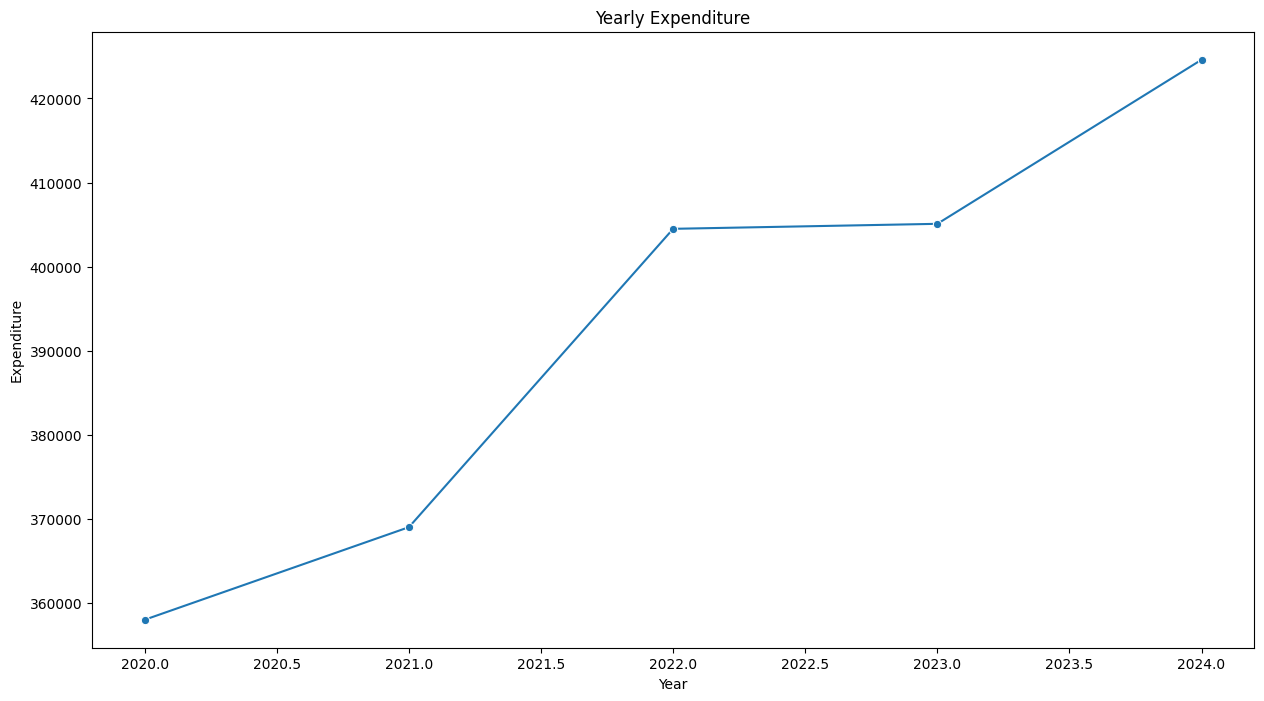

In [14]:
plt.figure(figsize=(15,8))
yearly_spendings=df_exp_yearly.groupby('Year')['Amount'].sum().reset_index()
sns.lineplot(x='Year', y='Amount', data=yearly_spendings, marker='o')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title("Yearly Expenditure")
plt.show()

In [36]:
df_exp_monthly = df.copy()
df_exp_monthly['Year']=df_exp_monthly['Date'].dt.to_period('y')
df_exp_monthly['Month'] = df_exp_monthly['Date'].dt.to_period('m')

df_year_month=df_exp_monthly.groupby(['Year','Month'])['Amount'].sum()
df_year_month

Year  Month  
2020  2020-01    22716.25
      2020-02    37178.41
      2020-03    17046.81
      2020-04    23603.05
      2020-05    22854.13
      2020-06    33026.72
      2020-07    30118.27
      2020-08    46327.80
      2020-09    22900.15
      2020-10    35059.99
      2020-11    35104.16
      2020-12    32103.12
2021  2021-01    29381.11
      2021-02    20729.23
      2021-03    56689.24
      2021-04    24265.71
      2021-05    29063.78
      2021-06    27736.63
      2021-07    31848.37
      2021-08    22019.03
      2021-09    33529.76
      2021-10    26070.57
      2021-11    27230.37
      2021-12    40478.66
2022  2022-01    31778.61
      2022-02    39941.69
      2022-03    48483.19
      2022-04    31663.01
      2022-05    43661.05
      2022-06    36861.78
      2022-07    30545.82
      2022-08    38654.00
      2022-09    38924.86
      2022-10    23607.30
      2022-11    24845.74
      2022-12    15535.30
2023  2023-01    54666.75
      2023-02    34137.0

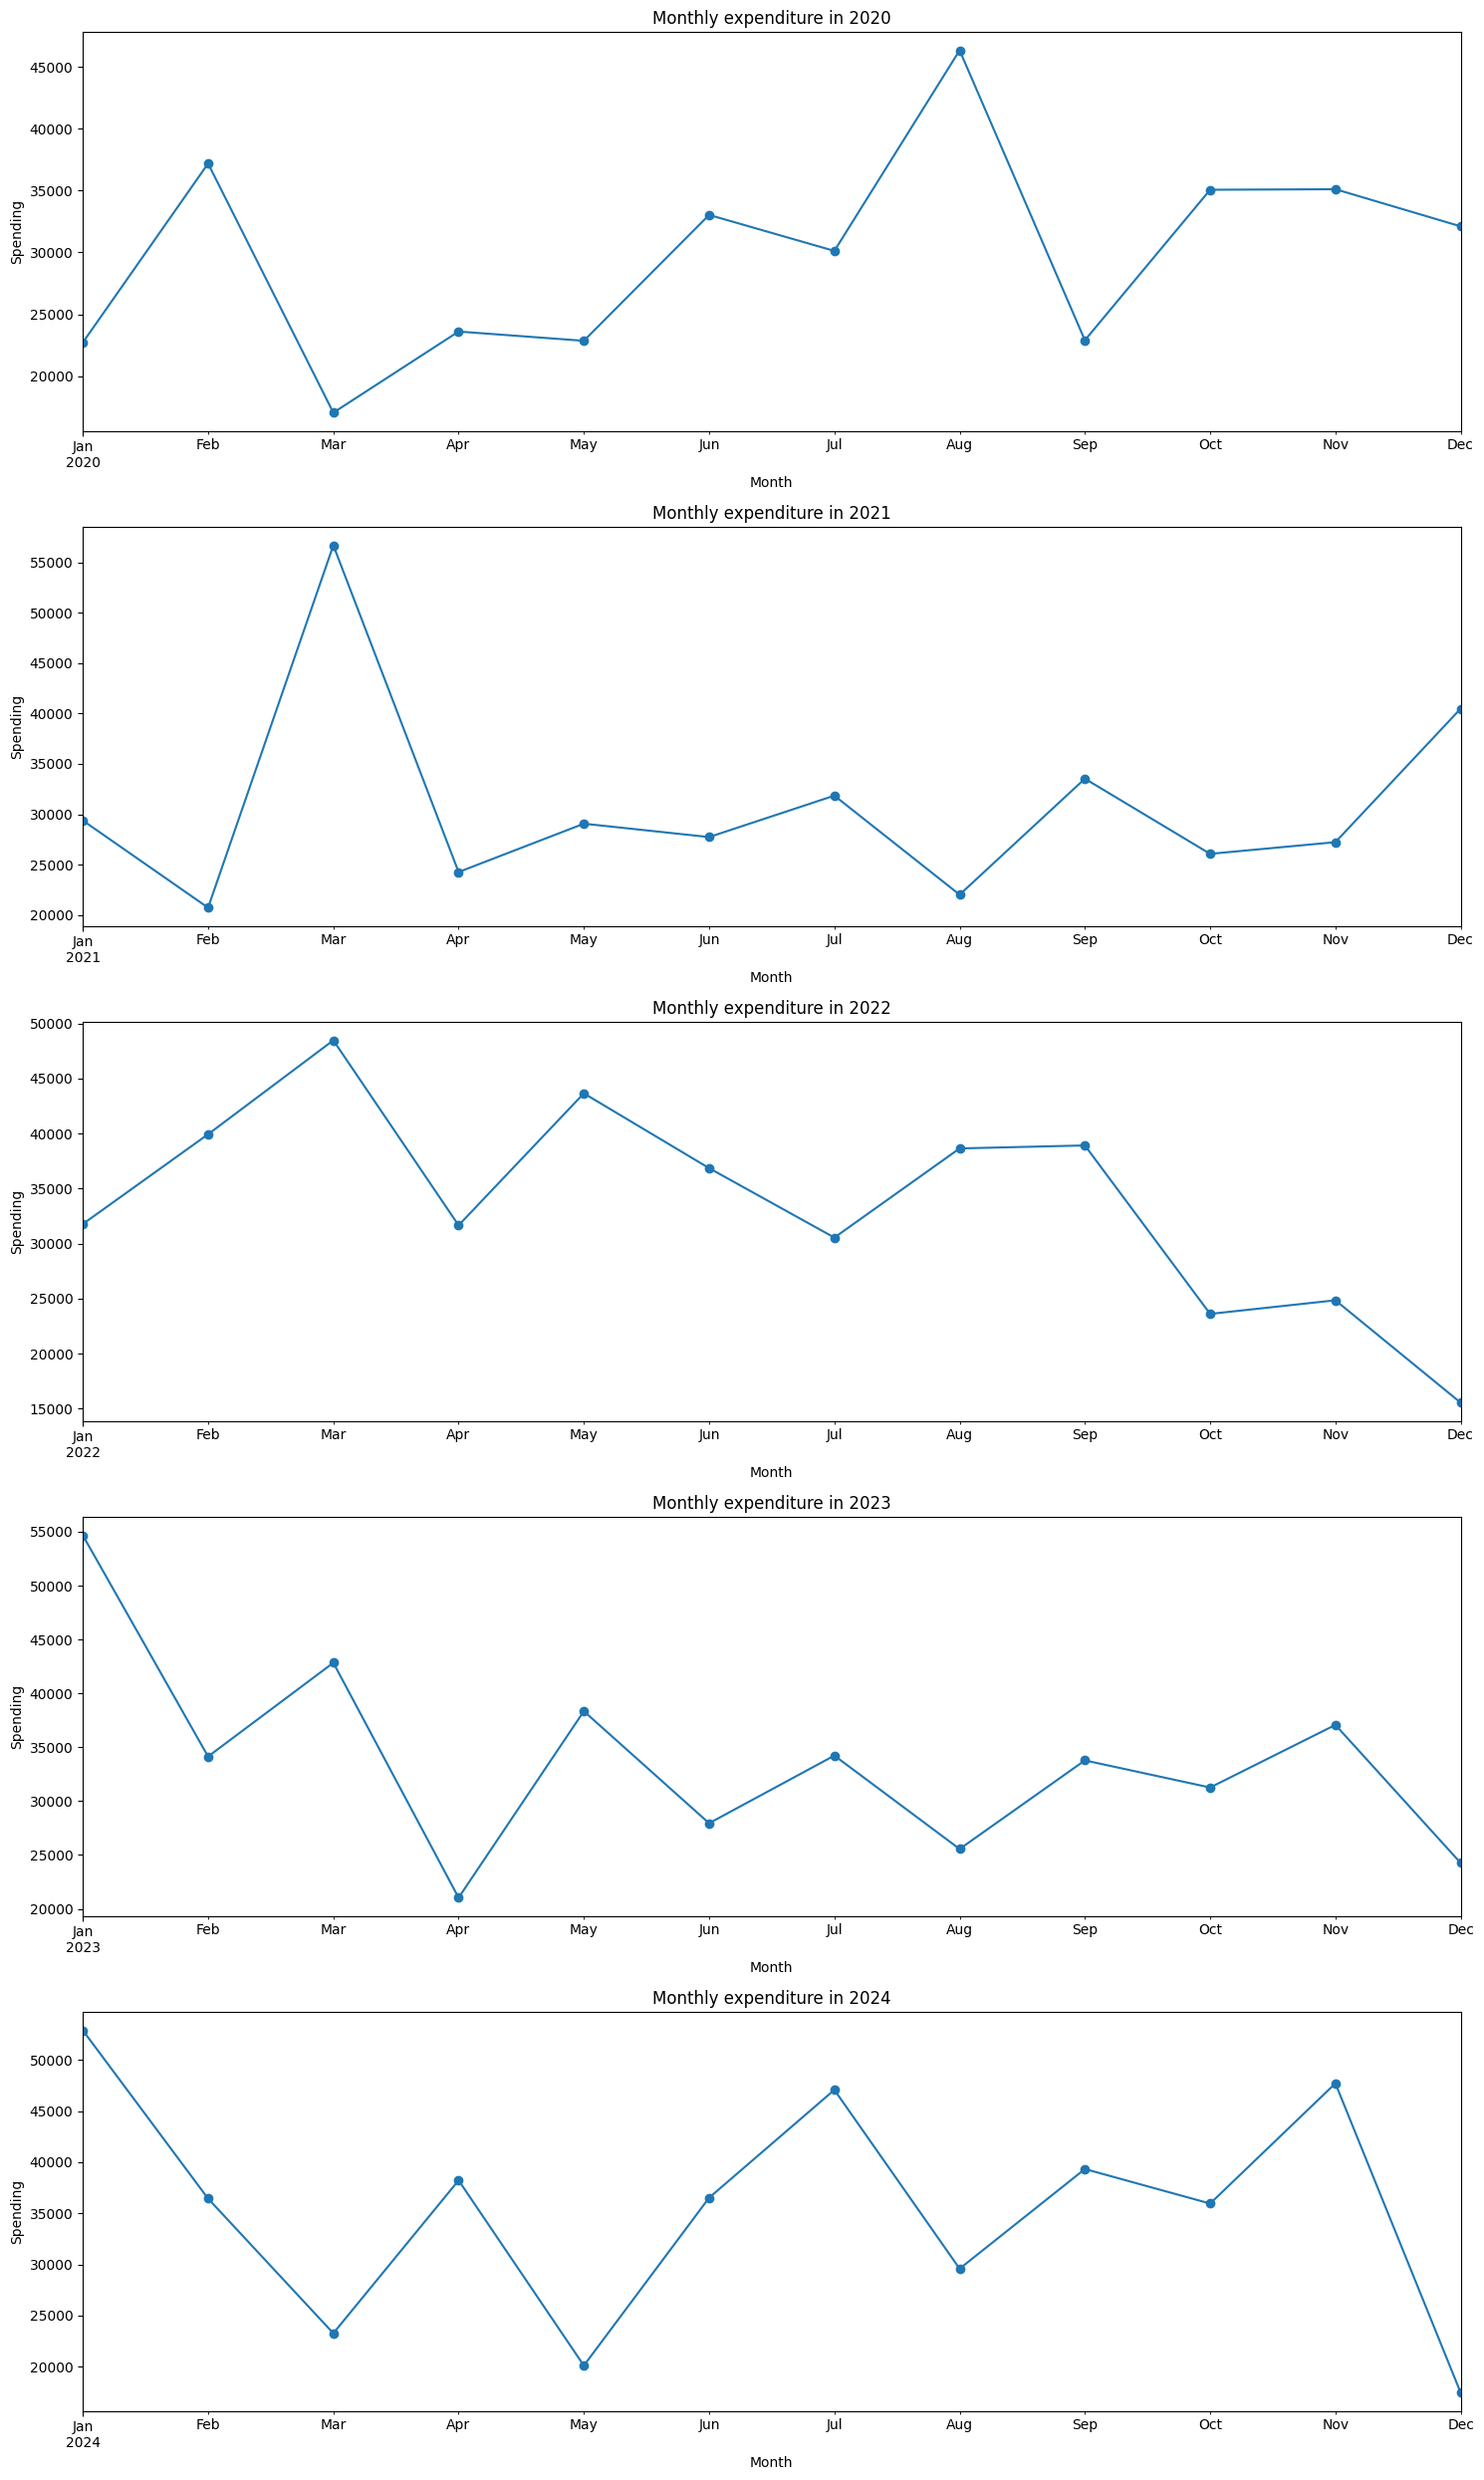

In [62]:
years=df_year_month.index.get_level_values(0).unique()
n_years=len(years)

plt.figure(figsize=(15,5*n_years))

for i,year in enumerate(years,1):
    plt.subplot(n_years,1,i)
    year_months=df_year_month.loc[year]
    year_months.plot(marker='o',kind='line')
    plt.title(f"Monthly expenditure in {year}")
    plt.xlabel('Month')
    plt.ylabel('Spending')
plt.tight_layout()
plt.show()
